# Fantasy Premier League

## Chip Strategy

Chips are bonuses to use once per gameweek. The **Wildcard** allows you to make unlimited transfer for a week. The **Freehit** allows to make unlimited transfers (temporary for a single GW). The **Bench Boost** gives you the points scored by yout benched players. The **Triple Captain** triples the points of yout captain instead of double.

In this notebook, we will study the chip strategy of top managers from the 2020-2021 FPL Season.

In [1]:
import pandas as pd
import numpy as np
# Get fixtures
fixtures = pd.read_csv("../data/fpl_official/vaastav/data/2020-21/fixtures.csv")[['event', 'team_a', 'team_h']]

gw_type = {}
for gw in range(1, 39):
    if fixtures[fixtures['event'] == gw].shape[0] < 10:
        gw_type[gw] = 'BGW'
    elif fixtures[fixtures['event'] == gw].shape[0] > 10:
        gw_type[gw] = 'DGW'
    else :
        # Handle dgw for some & bgw for others
        playing_teams = list(fixtures[fixtures['event'] == 1]['team_a'].values) + list(fixtures[fixtures['event'] == 1]['team_h'].values)
        if np.all([team_id in playing_teams for team_id in np.arange(1, 20)]):
            gw_type[gw] = 'Mixed'
        else:
            gw_type[gw] = 'Vanilla'

## Chip usage

In [2]:
import glob
import os

path = '../data/fpl_official/20-21/season/raw/'
all_managers = glob.glob(os.path.join(path, "managers_[0-9][0-9][0-9][0-9][0-9].json")) + \
    glob.glob(os.path.join(path, "managers_[0-9][0-9][0-9][0-9].json"))

In [3]:
chips = (
    pd.DataFrame(
        list(pd.read_json(f, orient='index')['chips']),
        columns=['wildcard_1', 'freehit', 'bboost', 'wildcard_2', 'threexc'],
        index=pd.read_json(f, orient='index').index
        )
    for f in all_managers
    )

chips = pd.concat(chips)

In [4]:
# Change index type & Sort index
chips.drop('[]', inplace=True, errors='ignore')
chips.index = chips.index.map(int)
chips.sort_index(inplace=True)

In [5]:
chips = chips.fillna(0)
chips = chips.astype(int)
# Handle the cases when managers have only used their second Wildcard.
chips.loc[(chips['wildcard_2'] == 0) & (chips['wildcard_1'] > 16), 'wildcard_2'] = chips[chips['wildcard_2'] == 0]['wildcard_1']
chips.loc[(chips['wildcard_1'] == chips['wildcard_2']) & (chips['wildcard_1'] > 16), 'wildcard_1'] = 0

### Distribution

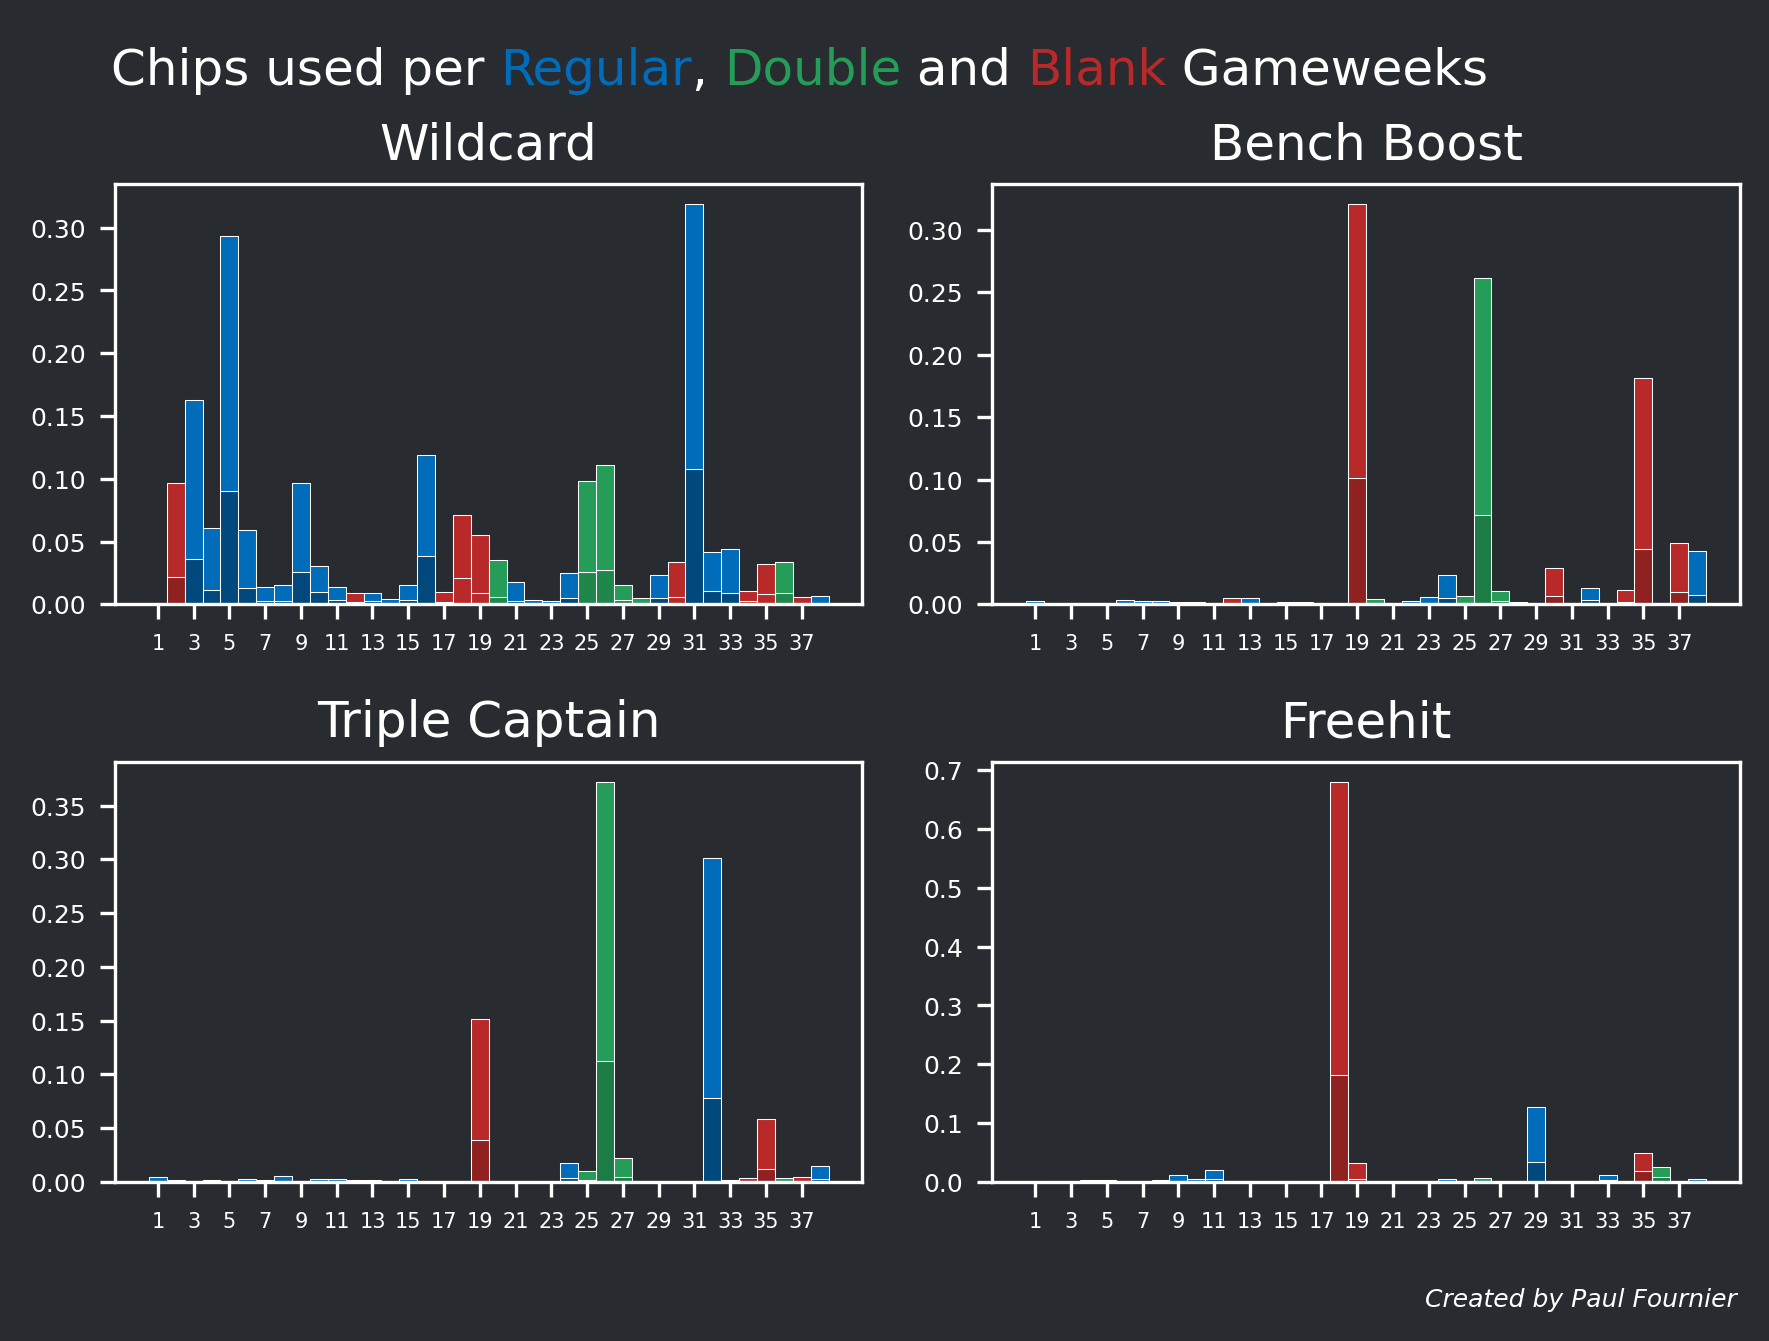

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 6

fig, axs = plt.subplots(2, 2, tight_layout=True)
fig.set_facecolor(background)
axs[0, 0].patch.set_alpha(0)
axs[0, 1].patch.set_alpha(0)
axs[1, 0].patch.set_alpha(0)
axs[1, 1].patch.set_alpha(0)

_, _, patches = axs[0, 0].hist(
    [chips['wildcard_2'].loc[:25000], chips['wildcard_2'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    label='2', stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#B82A2A')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#20874C')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

_, _, patches = axs[0, 0].hist(
    [chips['wildcard_1'].loc[:25000], chips['wildcard_1'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    label='1', stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[0, 0].title.set_text('Wildcard')
axs[0, 0].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

_, _, patches = axs[0, 1].hist(
    [chips['bboost'].loc[:25000], chips['bboost'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[0, 1].title.set_text('Bench Boost')
axs[0, 1].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

_, _, patches = axs[1, 0].hist(
    [chips['threexc'].loc[:25000], chips['threexc'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[1, 0].title.set_text('Triple Captain')
axs[1, 0].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w') 
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w') 

_, _, patches = axs[1, 1].hist(
    [chips['freehit'].loc[:25000], chips['freehit'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[1, 1].title.set_text('Freehit')
axs[1, 1].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

fig_text(x=0.07, y=1.025,
        s="Chips used per <Regular>, <Double> and <Blank> Gameweeks",
        highlight_textprops=[
            {"color": '#016DBA'},
            {"color": '#259C58'},
            {"color": '#B82A2A'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

fig.text(0.8, -0.025, "Created by Paul Fournier", fontstyle="italic", fontsize=6, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()